<a href="https://colab.research.google.com/github/kbrh3/AI-algorithm-practice/blob/main/Exam2Stat400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("glmnet")
install.packages("MASS")
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Ridge estimates for lambda = 1 : 0.55" 
[2] "Ridge estimates for lambda = 1 : -0.4" 
[3] "Ridge estimates for lambda = 1 : 0.15" 
[4] "Ridge estimates for lambda = 1 : -0.05"
[1] "Ridge estimates for lambda = 0.4 : 0.785714285714286"  
[2] "Ridge estimates for lambda = 0.4 : -0.571428571428572" 
[3] "Ridge estimates for lambda = 0.4 : 0.214285714285714"  
[4] "Ridge estimates for lambda = 0.4 : -0.0714285714285714"


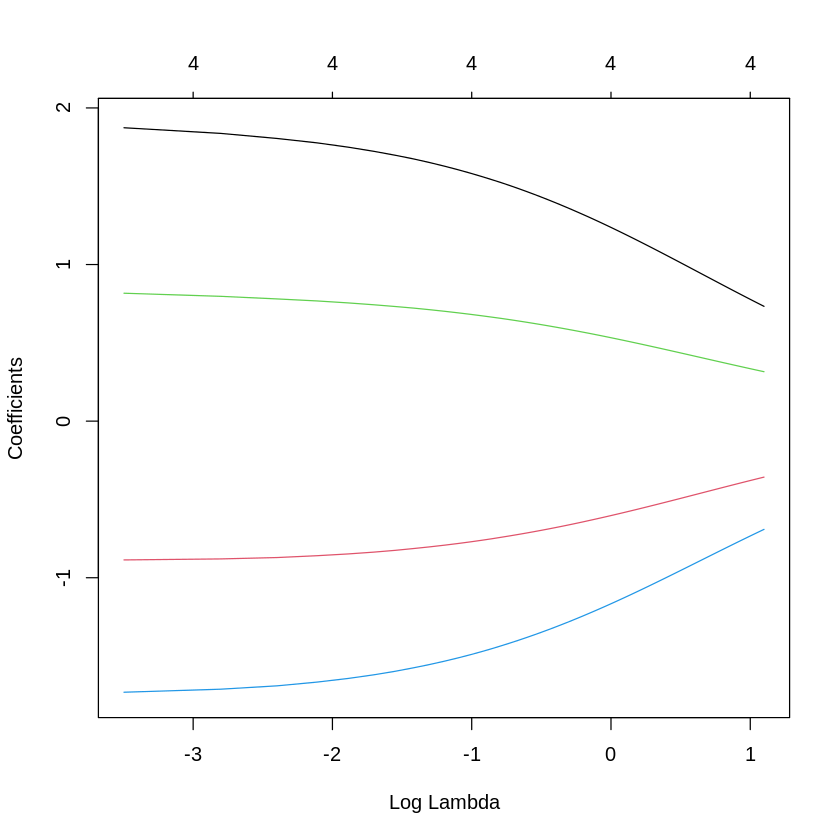

In [ ]:

library(glmnet)
beta_ols <- c(1.1, -0.8, 0.3, -0.1)
# RREstimates lambda = 1 and lambda = 0.4
lambda1 <- 1
lambda2 <- 0.4
beta_ridge_lambda1 <- (1 / (1 + lambda1)) * beta_ols
beta_ridge_lambda2 <- (1 / (1 + lambda2)) * beta_ols

#computed beta estimates for given lambda values??
print(paste("Ridge estimates for lambda =", lambda1, ":", beta_ridge_lambda1))
print(paste("Ridge estimates for lambda =", lambda2, ":", beta_ridge_lambda2))

# sequence of lambda values from 0 to 3
lambda_sequence <- seq(0, 3, length.out = 100)
n <- length(beta_ols)  #\observations
X <- diag(1, n, n)
y <- X %*% beta_ols + rnorm(n)  # Simulated response variable


ridge_model <- glmnet(X, y, alpha = 0, lambda = lambda_sequence)
plot(ridge_model, xvar = "lambda", label = TRUE)


     [,1] [,2]
[1,]  0.6  0.9
[2,] -0.3 -0.6
[3,]  0.0  0.1
[4,]  0.0  0.0


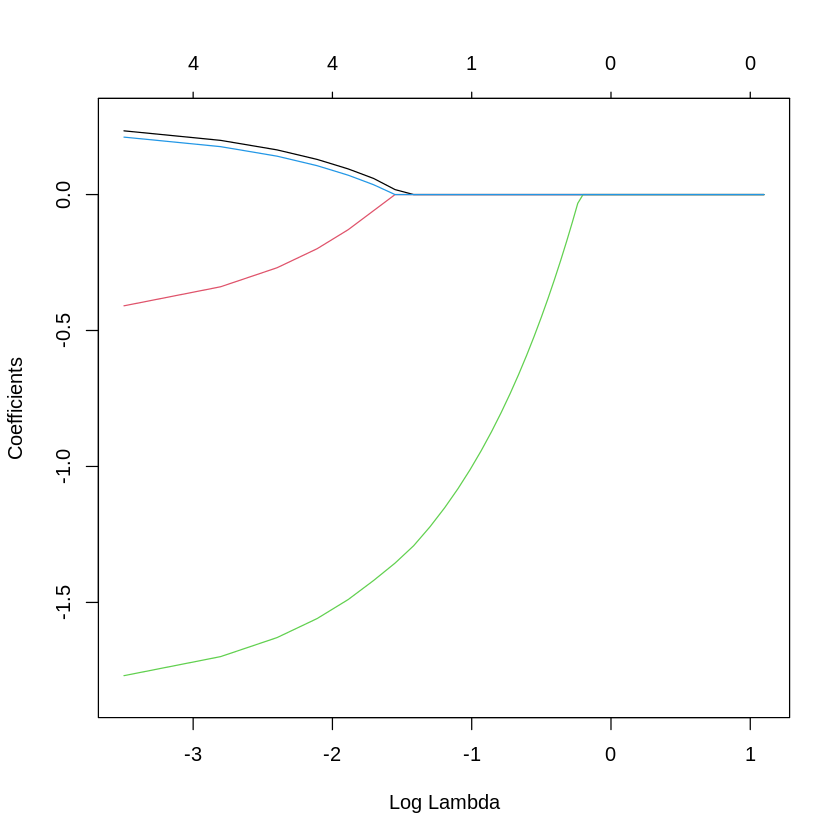

In [ ]:
#F p
library(glmnet)
beta_ols <- c(1.1, -0.8, 0.3, -0.1)
lambda_values <- c(1, 0.4)
#lasso Est.
beta_lasso <- sapply(lambda_values, function(l) {
  pmax(0, abs(beta_ols) - l / 2) * sign(beta_ols)
})
print(beta_lasso)
lambda_sequence <- seq(0, 3, length.out = 100)
n <- length(beta_ols)
X <- diag(1, n, n)
y <- X %*% beta_ols + rnorm(n)

lasso_model <- glmnet(X, y, alpha = 1, lambda = lambda_sequence)
plot(lasso_model, xvar = "lambda", label = TRUE)


In [ ]:
#part two - txt to csv??
# Read the tab-delimited text file
data <- read.table("/content/prostate.data.txt", header = TRUE, sep = "\t")

# Write the data to a CSV file
write.csv(data, "data.csv", row.names = FALSE)

data <- read.csv("/content/data.csv")
data <- data[,-1]  # Removes the first column
write.csv(data, "updatedData.csv", row.names = FALSE)




In [ ]:
library(glmnet)
library(MASS)
library(leaps)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [ ]:
#a - subset collection
#total predictors is 2^8
data <- read.csv("/content/updatedData.csv")
# Filter rows where the tenth column is "true"
filtered_data <- data[data[,10] == "TRUE", ]

# Write the filtered data to a new CSV file - do again for test data
write.csv(filtered_data, "trainData.csv", row.names = FALSE)

In [ ]:
#remove train data column ten
data <- read.csv("/content/trainData.csv")
data <- data[,-10]  # Removes the first column
write.csv(data, "FinalTrain.csv", row.names = FALSE)

In [ ]:
data <- read.csv("/content/FinalTrain.csv")
subset_fit <- leaps::regsubsets(lpsa ~ ., data = data, nbest = 1, really.big = TRUE)
summary(subset_fit)

subset_summary <- summary(subset_fit)
print(subset_summary)


Subset selection object
Call: regsubsets.formula(lpsa ~ ., data = data, nbest = 1, really.big = TRUE)
8 Variables  (and intercept)
        Forced in Forced out
lcavol      FALSE      FALSE
lweight     FALSE      FALSE
age         FALSE      FALSE
lbph        FALSE      FALSE
svi         FALSE      FALSE
lcp         FALSE      FALSE
gleason     FALSE      FALSE
pgg45       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         lcavol lweight age lbph svi lcp gleason pgg45
1  ( 1 ) "*"    " "     " " " "  " " " " " "     " "  
2  ( 1 ) "*"    "*"     " " " "  " " " " " "     " "  
3  ( 1 ) "*"    "*"     " " " "  "*" " " " "     " "  
4  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     " "  
5  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     "*"  
6  ( 1 ) "*"    "*"     " " "*"  "*" "*" " "     "*"  
7  ( 1 ) "*"    "*"     "*" "*"  "*" "*" " "     "*"  
8  ( 1 ) "*"    "*"     "*" "*"  "*" "*" "*"     "*"  

Subset selection object
Call: regsubsets.formula(lpsa ~ ., data = data, nbest = 1, really.big = TRUE)
8 Variables  (and intercept)
        Forced in Forced out
lcavol      FALSE      FALSE
lweight     FALSE      FALSE
age         FALSE      FALSE
lbph        FALSE      FALSE
svi         FALSE      FALSE
lcp         FALSE      FALSE
gleason     FALSE      FALSE
pgg45       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         lcavol lweight age lbph svi lcp gleason pgg45
1  ( 1 ) "*"    " "     " " " "  " " " " " "     " "  
2  ( 1 ) "*"    "*"     " " " "  " " " " " "     " "  
3  ( 1 ) "*"    "*"     " " " "  "*" " " " "     " "  
4  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     " "  
5  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     "*"  
6  ( 1 ) "*"    "*"     " " "*"  "*" "*" " "     "*"  
7  ( 1 ) "*"    "*"     "*" "*"  "*" "*" " "     "*"  
8  ( 1 ) "*"    "*"     "*" "*"  "*" "*" "*"     "*"  


In [ ]:

subset_summary <- summary(subset_fit)
bic_values <- subset_summary$bic
adjr2_values <- subset_summary$adjr2
cp_values <- subset_summary$cp


best_bic_index <- which.min(bic_values)
best_adjr2_index <- which.max(adjr2_values)
best_cp_index <- which.min(cp_values)

cat("Best Model BIC :\n")
print(subset_summary$which[best_bic_index, ])

cat("Best Model Adjusted R²:\n")
print(subset_summary$which[best_adjr2_index, ])

cat("Best Model Mallow's Cp:\n")
print(subset_summary$which[best_cp_index, ])


In [ ]:
# Get a summary of the subset selection
subset_summary <- summary(subset_fit)

# View more details about the model statistics
print(subset_summary$rss)         # Residual Sum of Squares for each model
print(subset_summary$adjr2)       # Adjusted R-squared for each model
print(subset_summary$cp)          # Mallow's Cp for each model
print(subset_summary$bic)         # Bayesian Information Criterion for each model


In [ ]:
# Plotting different statistics
plot(subset_fit, scale = "r2")
plot(subset_fit, scale = "Cp")
plot(subset_fit, scale = "bic")


In [ ]:
#part C
library(MASS)
data <- read.csv("/content/FinalTrain.csv")
initial_model <- lm(lpsa ~ 1, data = data)
stepwise_model <- stepAIC(initial_model, direction = "forward", scope = list(lower = initial_model, upper = response ~ .), data = train_data)
summary(stepwise_model)

In [ ]:
# Initial model with only the intercept
null_model <- lm(lpsa ~ 1, data = data)

# Run forward stepwise selection
step_model <- stepAIC(null_model, direction = "forward", scope = list(lower = null_model, upper = lpsa ~ .), trace = TRUE)

# Print the summary of the final model
print(summary(step_model))

# To get the number of models fitted, you will have to count the steps manually as R doesn't keep track of this automatically
# The trace output during the stepwise selection (when trace=TRUE) will help you count the steps


In [ ]:
# Load necessary libraries - copied from homework - change CSV name
library(MASS)  # For stepAIC
gala_data <- read.csv("/content/FinalTrain.csv")

response_var <- "lpsa"  #response
predictor_vars <- names(gala_data)[-1]  #predictors

#start w/ no predictors
start.model <- lm(as.formula(paste(response_var, "~ 1")), data=gala_data)
#forward stepwise selection
forward.model <- stepAIC(start.model, direction="forward",
                         scope=as.formula(paste(response_var, "~", paste(predictor_vars, collapse="+"))),
                         trace=TRUE)  # Set trace=TRUE to see details during the stepwise selection


summary(forward.model)



In [ ]:

bic_value <- BIC(forward.model)
adj_r_squared <- summary(forward.model)$adj.r.squared
# Computing Mallow's Cp, needs number of predictors (p) and residual sum of squares (RSS)
p <- length(coef(forward.model)) - 1  # minus 1 to exclude intercept??
rss <- sum(resid(forward.model)^2)
n <- length(resid(forward.model))
mse <- rss / n
cp_value <- (rss + 2 * p * mse) / n

# Print the values
cat("BIC:", bic_value, "\n")
cat("Adjusted R-squared:", adj_r_squared, "\n")
cat("Mallow's Cp:", cp_value, "\n")


BIC: 188.2379 
Adjusted R-squared: 0.5058707 
Mallow's Cp: 0.7466939 


In [ ]:
# e lasso regression


In [ ]:
data <- read.csv("/content/updatedData.csv")
#assume the last column is a train/test indicator where 'TRUE' indicates the training data.
train_data <- data[data$Column10 == TRUE, ]
test_data <- data[data$Column10 == FALSE, ]
print(train_data)
print(test_data)


 [1] lcavol  lweight age     lbph    svi     lcp     gleason pgg45   lpsa   
[10] train  
<0 rows> (or 0-length row.names)
 [1] lcavol  lweight age     lbph    svi     lcp     gleason pgg45   lpsa   
[10] train  
<0 rows> (or 0-length row.names)


In [ ]:
train_data <- read.csv("/content/trainData.csv")
# Assuming that the first 8 columns are predictors and the 9th column is 'lpsa'.
X_train <- as.matrix(train_data[, 1:8])
y_train <- train_data[, "lpsa"]


In [ ]:
var(y_train)  # Should be greater than 0
table(y_train)  # Should have more than one unique value


In [ ]:
sum(is.na(y_train))  # This will tell you how many NA values are present


[1] 0

In [ ]:
print(y_train)


In [ ]:
length(y_train)


[1] 67

Best lambda value - cross-validation: 0.0121715 
[1] "Non-zero coefficients:"
[1]  0.172708236  0.546615723  0.597820655 -0.015393586  0.135705554
[6]  0.675719144 -0.150165483  0.007516022
 MSE for best lambda: 0.4422002 


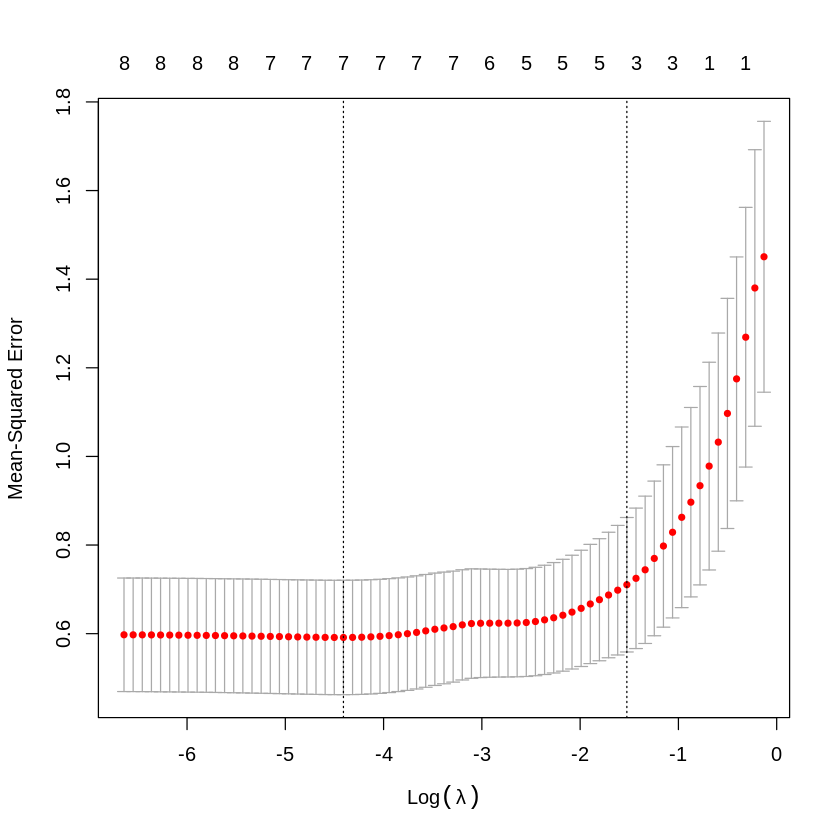

In [ ]:
set.seed(123)
cv_fit <- cv.glmnet(X_train, y_train, alpha = 1, nfolds = 10)
best_lambda <- cv_fit$lambda.min
best_coeffs <- coef(cv_fit, s = best_lambda)
cat("Best lambda value - cross-validation:", best_lambda, "\n")
print("Non-zero coefficients:")
print(best_coeffs[best_coeffs != 0])
train_mse <- mean((predict(cv_fit, newx = X_train, s = best_lambda) - y_train)^2)
cat(" MSE for best lambda:", train_mse, "\n")

plot(cv_fit)

In [ ]:
train_data <- read.csv("/content/trainData.csv")
# Assuming that the first 8 columns are predictors and the 9th column is 'lpsa'.
X_train <- as.matrix(train_data[, 1:8])
y_train <- train_data[, "lpsa"]


In [ ]:
set.seed(123)  # For reproducibility
cv_ridge <- cv.glmnet(X_train, y_train, alpha = 0, nfolds = 10)


In [ ]:
best_lambda_ridge <- cv_ridge$lambda.min


In [ ]:
ridge_pred <- predict(cv_ridge, s = best_lambda_ridge, newx = X_train)
ridge_mse <- mean((y_train - ridge_pred)^2)

In [ ]:
cat("Best Lambda - ridge regression:", best_lambda_ridge, "\n")
cat("Training MSE - ridge regression:", ridge_mse, "\n")


Best Lambda - ridge regression: 0.08788804 
Training MSE - ridge regression: 0.4473332 


In [ ]:
ridge_coeffs <- coef(cv_ridge, s = best_lambda_ridge)
print(ridge_coeffs)


9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.095549713
lcavol       0.492656404
lweight      0.601227708
age         -0.014818243
lbph         0.137965816
svi          0.679288020
lcp         -0.116652810
gleason      0.017256035
pgg45        0.007077847


In [ ]:
#generate TEST data
data <- read.csv("/content/updatedData.csv")
# Filter rows where the tenth column is "true"
filtered_data <- data[data[,10] == "FALSE", ]

# Write the filtered data to a new CSV file - do again for test data
write.csv(filtered_data, "testData.csv", row.names = FALSE)
train_data <- read.csv("/content/testData.csv")
# first 8 columns are predictors and the 9th column is 'lpsa'.
X_test <- as.matrix(train_data[, 1:8])
y_test <- train_data[, "lpsa"]


In [ ]:
var(X_test)  # Should be greater than 0
table(y_test)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.07462426,0.06346604,0.7013471,-0.11453530,0.16813834,0.93330306,0.35774323,8.198108
lweight,0.06346604,0.09054985,1.1153729,0.21551016,0.00890660,0.08725952,0.03969092,1.976747
age,0.70134708,1.11537291,49.6103448,5.53063575,0.22758621,0.49233069,0.49655172,41.534483
lbph,-0.11453530,0.21551016,5.5306358,2.08595321,0.02558343,0.35856989,0.18740439,14.003029
svi,0.16813834,0.00890660,0.2275862,0.02558343,0.16551724,0.39306705,0.11034483,4.103448
lcp,0.93330306,0.08725952,0.4923307,0.35856989,0.39306705,1.99761959,0.63867223,21.048099
gleason,0.35774323,0.03969092,0.4965517,0.18740439,0.11034483,0.63867223,0.57931034,15.206897
pgg45,8.19810842,1.97674722,41.5344828,14.00302930,4.10344828,21.04809873,15.20689655,652.626437


y_test
0.7654678  1.047319 1.3987169 1.6582281 1.7316555 1.7664417 1.8164521  2.008214 
        1         2         1         1         1         1         1         1 
2.0215476 2.0856721 2.3075726 2.3749058 2.5687881 2.5915164 2.6844403 2.6912431 
        1         1         1         1         1         2         1         1 
2.7047113 2.7880929 2.8535925 2.8820035 2.8875901 3.0563569 3.0750055 3.5130369 
        1         1         1         2         1         1         1         1 
3.5709402 5.1431245 5.5829322 
        1         1         1 

In [ ]:
# Calculate predictions for each model
pred_subset <- predict(best_model_subset, newdata = test_data)
pred_forward <- predict(best_model_forward, newdata = test_data)
pred_lasso <- predict(cv_lasso, newx = X_test, s = "lambda.min")
pred_ridge <- predict(cv_ridge, newx = X_test, s = "lambda.min")

# Calculate the MSE for each model
mse_subset <- mean((y_test - pred_subset)^2)
mse_forward <- mean((y_test - pred_forward)^2)
mse_lasso <- mean((y_test - pred_lasso)^2)
mse_ridge <- mean((y_test - pred_ridge)^2)

# Compare MSEs and report
mse_values <- c(subset = mse_subset, forward = mse_forward, lasso = mse_lasso, ridge = mse_ridge)
best_method <- names(which.min(mse_values))
cat("The model with the lowest test MSE is from", best_method, "with an MSE of", min(mse_values), "\n")

In [ ]:
#last homework - update for this exam - part G
# Load data
train_data <- read.csv("/content/trainData.csv")
# Assuming that the first 8 columns are predictors and the 9th column is 'lpsa'.
X_train <- as.matrix(train_data[, 1:8])
y_train <- train_data[, "lpsa"]


In [ ]:

set.seed(123)  # for reproducibility
#trainIndex <- createDataPartition(data$Species, p = .8, list = FALSE)
trainData <- read.csv('/content/trainData.csv')
testData <- read.csv('/content/testData.csv')


In [ ]:
subset_fit <- regsubsets(lpsa~., data=trainData, nvmax=10, method="exhaustive")
best_subset <- summary(subset_fit)$which[which.min(summary(subset_fit)$bic),]
subset_coefficients <- coef(subset_fit, id=which.min(summary(subset_fit)$bic))

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“nvmax reduced to  8”


In [ ]:
# Fit forward stepwise selection
forward_fit <- regsubsets(lpsa~., data=trainData, nvmax=10, method="forward")
forward_best <- summary(forward_fit)$which[which.min(summary(forward_fit)$bic),]
forward_coefficients <- coef(forward_fit, id=which.min(summary(forward_fit)$bic))

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“nvmax reduced to  8”
Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


In [ ]:
# Fit LASSO and Ridge regression
X_train <- model.matrix(lpsa~., trainData)[,-1]
y_train <- trainData$lpsa
cv_lasso <- cv.glmnet(x_train, y_train, alpha=1)
cv_ridge <- cv.glmnet(x_train, y_train, alpha=0)

In [ ]:

predict_subset <- function(newdata, coefficients, formula) {
  predictors <- model.matrix(formula, newdata)
  predict_values <- predictors %*% coefficients
  return(predict_values)
}

In [ ]:

print(subset_coefficients)
print(is.null(subset_coefficients))
print(length(subset_coefficients))
formula_string <- paste("lpsa ~", paste(names(subset_coefficients)[-1], collapse=" + "))
print(formula_string)
subset_formula <- as.formula(formula_string)
print(subset_formula)

(Intercept)      lcavol     lweight 
 -1.0494396   0.6276074   0.7383751 
[1] FALSE
[1] 3
[1] "lpsa ~ lcavol + lweight"
lpsa ~ lcavol + lweight


In [ ]:

subset_coef_names <- names(coef(subset_fit, id=which.min(summary(subset_fit)$bic)))[-1]
forward_coef_names <- names(coef(forward_fit, id=which.min(summary(forward_fit)$bic)))[-1]
subset_formula_str <- paste("lpsa ~", paste(subset_coef_names, collapse=" + "))
forward_formula_str <- paste("lpsa ~", paste(forward_coef_names, collapse=" + "))
subset_formula <- as.formula(subset_formula_str)
forward_formula <- as.formula(forward_formula_str)

# Check formulas
print(subset_formula)
print(forward_formula)



lpsa ~ lcavol + lweight
lpsa ~ lcavol + lweight


In [ ]:
# Formulas for model matrices
subset_formula <- as.formula(paste("lpsa - ", paste(names(subset_coefficients)[-1], collapse=" + "), "- 1"))
forward_formula <- as.formula(paste("lpsa -", paste(names(forward_coefficients)[-1], collapse=" + "), "- 1"))

ERROR: Error in class(ff) <- "formula": attempt to set an attribute on NULL


In [ ]:

pred_subset <- predict_subset(testData, subset_coefficients, subset_formula)
pred_forward <- predict_subset(testData, forward_coefficients, forward_formula)
pred_lasso <- predict(cv_lasso, s="lambda.min", newx=model.matrix(lpsa~., testData)[,-1])
pred_ridge <- predict(cv_ridge, s="lambda.min", newx=model.matrix(lpsa~., testData)[,-1])

# test mse for each
test_mse_subset <- mean((testData$lpsa - pred_subset)^2)
test_mse_forward <- mean((testData$lpsa - pred_forward)^2)
test_mse_lasso <- mean((testData$lpsa - pred_lasso)^2)
test_mse_ridge <- mean((testData$lpsa - pred_ridge)^2)

# Output MSEs
print(paste("Subset MSE:", test_mse_subset))
print(paste("Forward MSE:", test_mse_forward))
print(paste("LASSO MSE:", test_mse_lasso))
print(paste("Ridge MSE:", test_mse_ridge))


[1] "Subset MSE: 0.492482347680504"
[1] "Forward MSE: 0.492482347680504"
[1] "LASSO MSE: 0.517244140561835"
[1] "Ridge MSE: 0.494379346835475"
